Labels : [0 0 3 3 0 1 1 3 3 2 1 0 1 2 3 3 0 3 2 3 3 0 1 2 3 2 0 1 2 1 1 1 0 1 1 0 2
 3 2 0 2 3 3 0 1 0 3 3 0 0 2 2 1 3 3 1 1 2 2 0 0 2 0 0 0 1 3 0 3 1 2 3 2 0
 2 0 1 1 3 3 2 3 2 3 3 1 2 2 0 2 2 2 0 2 3 3 0 0 0 3 2 2 0 2 3 3 1 0 3 2 2
 1 2 2 0 2 0 3 1 0 3 2 0 0 2 0 0 0 0 2 3 2 1 2 2 2 3 0 3 1 0 0 0 0 1 2 3 3
 1 2 2 0 3 3 3 1 1 0 1 3 0 3 0 0 1 1 0 3 2 1 0 2 0 1 3 2 3 2 2 2 0 0 0 3 1
 2 1 0 1 2 0 1 2 1 1 2 3 1 3 2 2 3 1 1 3 1 1 3 1 1 1 0 0 0 3 0 1 2 2 2 3 0
 1 2 1 0 2 3 2 1 1 1 1 1 3 3 3 1 2 0 0 1 1 0 2 2 3 0 3 3 3 1 0 2 3 2 2 1 2
 1 3 3 0 2 0 0 3 3 2 0 3 2 0 1 0 2 1 1 3 0 0 3 0 1 0 1 1 0 3 3 3 0 2 2 0 2
 2 2 3 0 0 2 3 2 0 0 1 2 2 3 2 3 0 3 2 1 2 1 1 3 3 3 1 1 2 0 3 1 2 0 3 3 0
 0 1 0 1 1 3 1 2 0 0 3 1 3 0 0 0 0 3 0 3 0 3 3 2 0 3 2 2 1 3 0 0 1 1 0 1 2
 3 3 3 2 3 1 3 2 2 3 2 2 1 2 2 1 1 1 1 2 2 2 2 0 2 0 3 0 2 3 0 3 0 3 1 1 2
 3 2 1 3 0 2 1 3 0 2 1 1 3 0 3 0 1 0 3 0 2 1 0 2 0 3 1 3 1 0 2 3 3 1 0 0 3
 3 1 3 1 2 0 1 0 2 1 1 1 2 1 3 2 1 1 1 1 1 3 2 0 1 0 3 0 1 2 3 2 1 2 3 2 3
 1 1 2 1 1 1 2 0

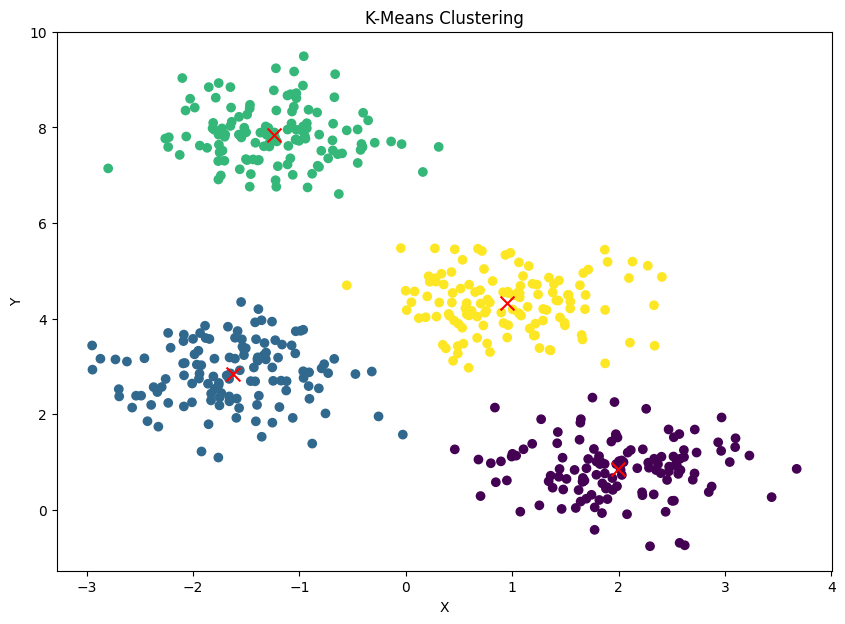

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 클러스터 데이터 생성
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

# K-평균 군집화 모델 생성 및 학습
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# 군집 레이블 출력
print(f"Labels : {kmeans.labels_}")

# 군집 중심점 출력
print(f"Cluster centers {kmeans.cluster_centers_}")

# 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="r",
    marker="x",
)
plt.title("K-Means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Labels : [1 0 2 1 0 1 0 0 1]
Cluster cneters : [[5.250e+01 8.875e+04]
 [3.500e+01 5.875e+04]
 [2.500e+01 3.500e+04]]


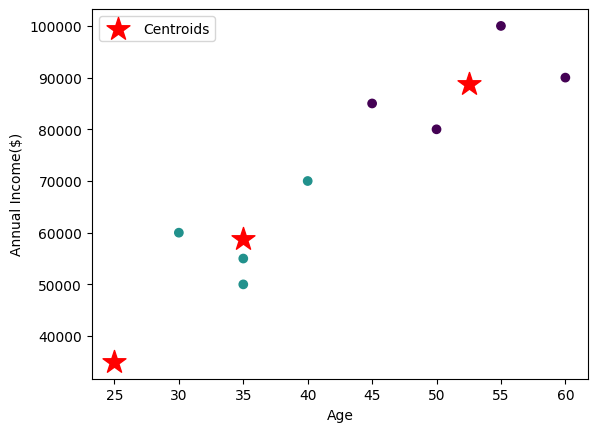

In [4]:
# 고객 데이터 생성 (연령, 소득)
X = np.array(
    [
        [35, 50000],
        [45, 85000],
        [25, 35000],
        [30, 60000],
        [55, 100000],
        [40, 70000],
        [60, 90000],
        [50, 80000],
        [35, 55000],
    ]
)

# K-평균 군집화 모델 생성 및 학습 (k=3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# 군집 레이블 출력
print(f"Labels : {kmeans.labels_}")

# 군집 중심점 출력
print(f"Cluster cneters : {kmeans.cluster_centers_}")

# 시각화
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="r",
    marker="*",
    label="Centroids",
)
plt.xlabel("Age")
plt.ylabel("Annual Income($)")
plt.legend()
plt.show()

## 연관 분석

In [5]:
%pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 68.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 데이터 생성
transactions = [
    ["bread", "milk"],
    ["bread", "jam", "milk"],
    ["beer", "cola"],
    ["bread", "milk", "cola"],
    ["milk", "cola", "eggs"],
]

# 트랜잭션 데이터를 one-hot encoding 으로 DataFrame 변환
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)
# df = pd.DataFrame(transactions)
# print(df)
# df = df.apply(pd.Series).fillna(0).astype(bool).astype(int)
# print(df)

# 연관 규칙 학습
item_sets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(item_sets, metric="confidence", min_threshold=0.6)

# 결과 출력
print(rules)

    beer  bread   cola   eggs    jam   milk
0  False   True  False  False  False   True
1  False   True  False  False   True   True
2   True  False   True  False  False  False
3  False   True   True  False  False   True
4  False  False   True   True  False   True
      antecedents    consequents  antecedent support  consequent support  \
0          (beer)         (cola)                 0.2                 0.6   
1           (jam)        (bread)                 0.2                 0.6   
2          (milk)        (bread)                 0.8                 0.6   
3         (bread)         (milk)                 0.6                 0.8   
4          (eggs)         (cola)                 0.2                 0.6   
5          (cola)         (milk)                 0.6                 0.8   
6          (eggs)         (milk)                 0.2                 0.8   
7           (jam)         (milk)                 0.2                 0.8   
8   (cola, bread)         (milk)                 0.2

## 이상치 탐지

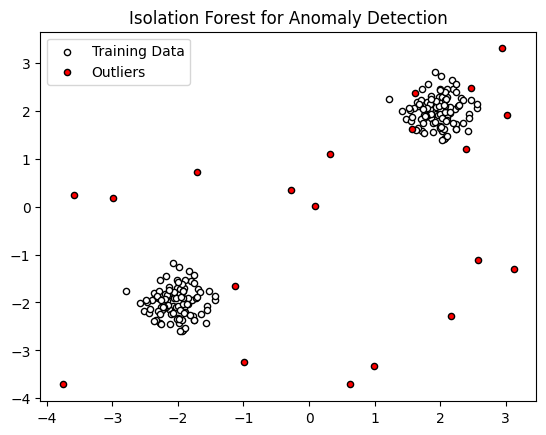

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# 예제 데이터 생성
np.random.seed(42)
# X 는 평균이 0이고 표준편차가 0.3(=1*0.3)인 정규분포를 따르는 100개의 2차원 데이터 포인트
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[
    X + 2, X - 2
]  # Numpy의 r_ 함수는 여러개의 배열을 row 방향으로 concatenate(연결)
# X_outliers는 각 차원이 -4와 4 사이의 균일 분포를 따르는 20개의 2차원 이상치 데이터 포인트 입니다.
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# 전체 데이터 (정상데이터 + 이상치)
X_total = np.r_[X_train, X_outliers]

# 모델 생성 및 학습
model = IsolationForest(contamination=0.1)
model.fit(X_train)

# 이상치 예측
y_pred_train = model.predict(X_train)
y_pred_outliers = model.predict(X_outliers)

# 결과 시각화
plt.scatter(
    X_train[:, 0], X_train[:, 1], c="white", edgecolor="k", s=20, label="Training Data"
)
plt.scatter(
    X_outliers[:, 0], X_outliers[:, 1], c="red", edgecolor="k", s=20, label="Outliers"
)
plt.legend()
plt.title("Isolation Forest for Anomaly Detection")
plt.show()

In [36]:
# 랜덤 데이터 생성 (정상거래)
np.random.seed(42)
transaction_amounts = np.random.normal(
    100, 20, 1000
)  # 평균이 100, 표준편차가 20인 거래 금액 1000개
transaction_times = np.random.normal(
    15, 5, 1000
)  # 평균이 15, 표준편차가 5인 거래시간 1000개

# 이상치 추가
anomalous_amounts = np.random.uniform(300, 500, 50)  # 300~500 사이 이상치 거래금액 50개
anomalous_times = np.random.uniform(30, 50, 50)  # 30~50 사이 이상치 거래 시간50개

# 정상 거래와 이상치 데이터 합치기
amounts = np.concatenate([transaction_amounts, anomalous_amounts])
times = np.concatenate([transaction_times, anomalous_times])

# 데이터 프레이 ㅁ생성
df = pd.DataFrame({"amount": amounts, "time": times})

# 모델 생성 및 학습
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df)

# 이상치 예측
df["is_outlier"] = model.predict(df)

# 이상치는 -1, 정상치는 1로 표시됨
df["is_outlier"] = df["is_outlier"].map({1: "normal", -1: "outlier"})

# 결과 출력
print(df["is_outlier"].value_counts())
print(df.head())

# LOF 모델 생성 및 학습
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df["lof_outlier"] = lof.fit_predict(df[["amount", "time"]])

# 이상치는 -1, 정상치는 1로 표시됨
df["lof_outlier"] = df["lof_outlier"].map({1: "normal", -1: "outlier"})

# 결과 출력
print(df["lof_outlier"].value_counts())
print(df.head())

is_outlier
normal     997
outlier     53
Name: count, dtype: int64
       amount       time is_outlier
0  109.934283  21.996777     normal
1   97.234714  19.623168     normal
2  112.953771  15.298152     normal
3  130.460597  11.765316     normal
4   95.316933  18.491117     normal
lof_outlier
normal     997
outlier     53
Name: count, dtype: int64
       amount       time is_outlier lof_outlier
0  109.934283  21.996777     normal      normal
1   97.234714  19.623168     normal      normal
2  112.953771  15.298152     normal      normal
3  130.460597  11.765316     normal      normal
4   95.316933  18.491117     normal      normal


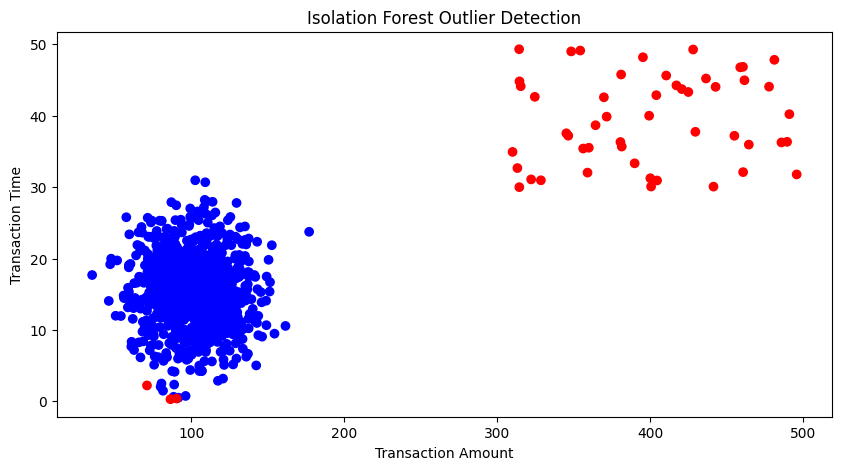

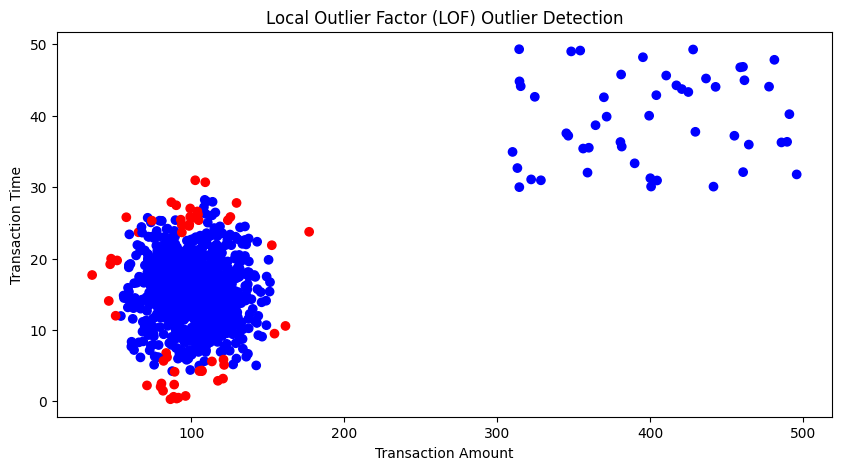

In [32]:
# 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(
    df["amount"], df["time"], c=df["is_outlier"].map({"normal": "b", "outlier": "r"})
)
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time")
plt.title("Isolation Forest Outlier Detection")
plt.show()

# LOF 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(
    df["amount"], df["time"], c=df["lof_outlier"].map({"normal": "b", "outlier": "r"})
)
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time")
plt.title("Local Outlier Factor (LOF) Outlier Detection")
plt.show()

# 차원확대/축소

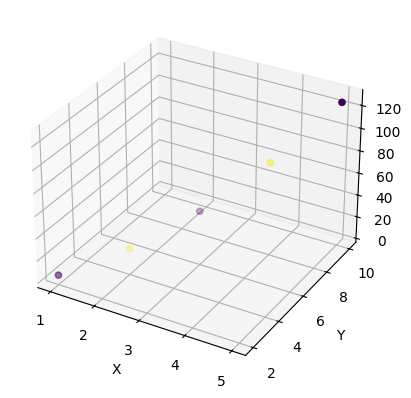

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2차원 데이터
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
labels = [0, 1, 0, 1, 0]

# 3차원 반환
z = np.square(x) + np.square(y)

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# 데이터 포인트 플롯
ax.scatter(x, y, z, c=labels)

# 축 라벨 설정
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 그래프 출력
plt.show()

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

df_scaled = pd.DataFrame(X_scaled, columns=cancer.feature_names)
df_scaled["target"] = pd.Series(cancer.target)

df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


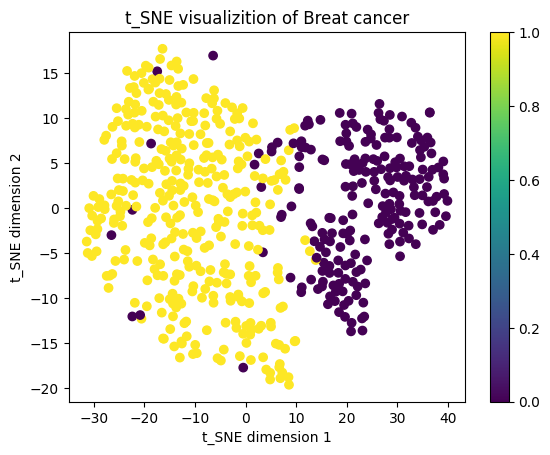

In [48]:
from sklearn.manifold import TSNE

# TSNE 적용
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 시각화
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cancer.target)
plt.xlabel("t_SNE dimension 1")
plt.ylabel("t_SNE dimension 2")
plt.title("t_SNE visualizition of Breat cancer")
plt.colorbar()
plt.show()

3차원으로 변형

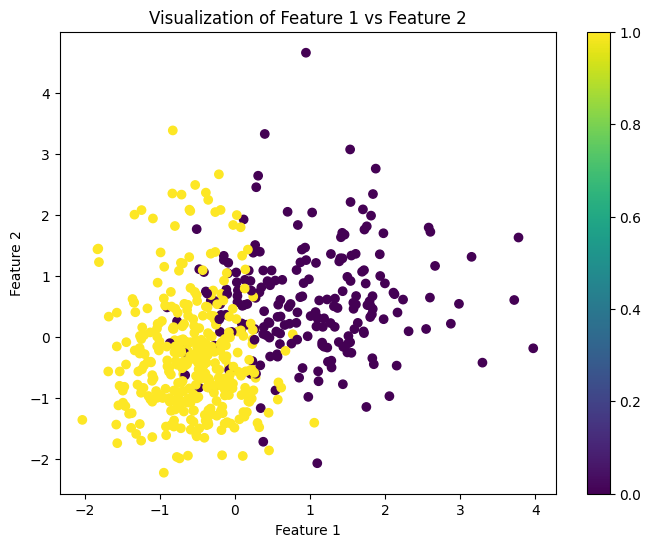

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cancer.target, cmap="viridis")
plt.colorbar()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of Feature 1 vs Feature 2")
plt.show()

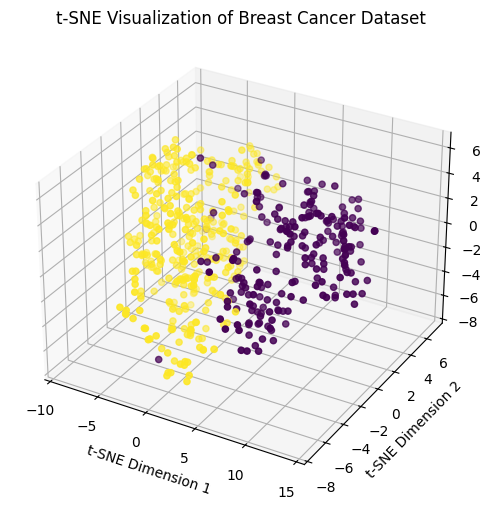

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=cancer.target)
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
ax.set_title("t-SNE Visualization of Breast Cancer Dataset")
plt.show()

# PCA의 차원 축소 및 시각화

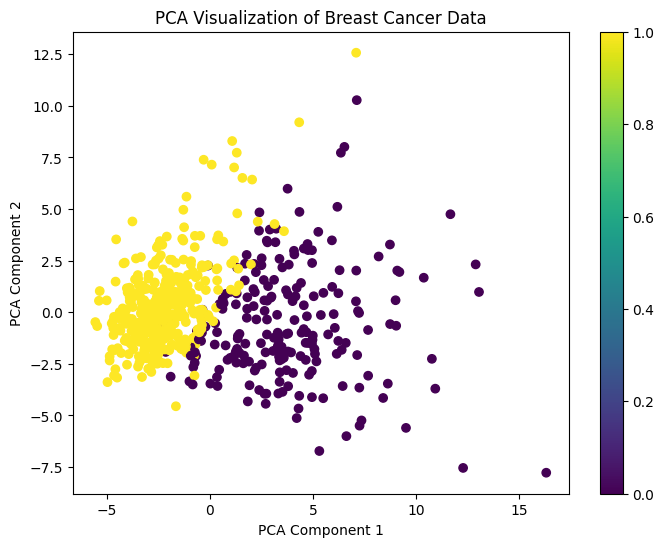

In [56]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 로드 및 스케일링
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (2차원)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.colorbar()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Breast Cancer Data")
plt.show()

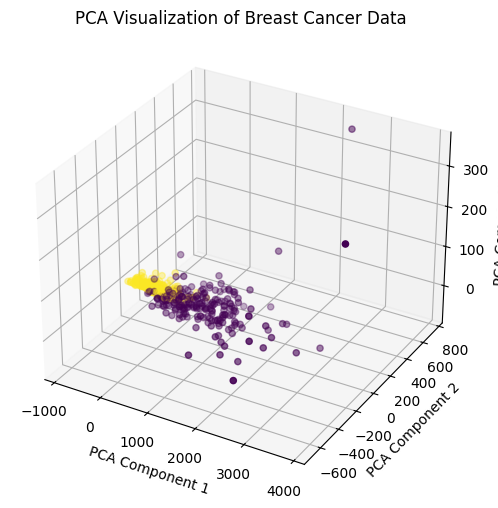

In [57]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cancer.target, cmap="viridis")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("PCA Visualization of Breast Cancer Data")
plt.show()